<a href="https://colab.research.google.com/github/MdShahadatHossainbd/ObjectDetection/blob/master/YOLOv3_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Hey what up,people! Hope you're having a good day! 
#Here I'm gonna show ya how to set up YOLOv3 the darknet version on Colab
#And use it to process images, video, and, especially, TRAIN your models!!
#You can contant me at https://twitter.com/Ivangrov, if you have questions
#Or something's not working
#Are you excited? Let's go!
#Don't forget to select GPU! 


#First, let's get some updates
!apt-get update
!apt-get upgrade

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [102 kB]
Get:12 http://ppa.l

In [ ]:
#Now here's some important stuff: after long and painful trial and error
#I found that OpenCV can only really be installed through apt-get if you 
#intsall this stuff first , got no idea which libraries are actually useful
#here though, to be frank, but everything works only after this step! =) 


!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev set to manually installed.
The following package was automatically 

In [ ]:
#And some more...
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [ ]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [ ]:
#Installing OpenCV
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
#Now let's clone Darknet fork from AlexeyAB that let's us put in the -dont_show flag
#That turns out to be quite handy, since we've got no display here :D
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 14285, done.
remote: Total 14285 (delta 0), reused 0 (delta 0), pack-reused 14285
Receiving objects: 100% (14285/14285), 12.84 MiB | 21.38 MiB/s, done.
Resolving deltas: 100% (9748/9748), done.


In [ ]:
#!cat throws an error on Makefile, so I use !vim to verify whether we 
#actually successfuly modified the Makefile
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 5 not upgraded.
Need to get 6,724 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.3 [49.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.3 [70.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 

In [ ]:
#Uncomment !vim line to check the Makefile, beware that you'll need to
#manually puase this cell to move forward

%cd darknet
#!vim Makefile

/content/darknet


In [10]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty	DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       video_yolov3.sh
cfg		data			net_cam_v3.sh	       video_yolov4.sh
cmake		image_yolov3.sh		net_cam_v4.sh	       yolov3.weights
CMakeLists.txt	image_yolov4.sh		README.md
--2020-09-02 04:18:30--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M   218KB/s    in 15m 57s 

2020-09-02 04:34:29 (253 KB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [11]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty	DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       video_yolov3.sh
cfg		data			net_cam_v3.sh	       video_yolov4.sh
cmake		image_yolov3.sh		net_cam_v4.sh	       yolov3.weights
CMakeLists.txt	image_yolov4.sh		README.md	       yolov3.weights.1


In [12]:
#Uncomment to check whether it worked, needs to be stopped manually 
#!vim Makefile

In [13]:
#Going to the parent directory
!ls
%cd ../
!ls

3rdparty	DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       video_yolov3.sh
cfg		data			net_cam_v3.sh	       video_yolov4.sh
cmake		image_yolov3.sh		net_cam_v4.sh	       yolov3.weights
CMakeLists.txt	image_yolov4.sh		README.md	       yolov3.weights.1
/content
darknet  sample_data


In [14]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 5 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base

In [15]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

5 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-09-02 04:36:26--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?ovxn3BIZRKFXVX_pfenrqcoZfI11_Fj6jxpZ6BAoa0EXkabxGnuiuAoG6eAfnGSR_kEv9BWfw6sLX50OEB_ny9sbe2UJPBizb72GGefZXNdFVN3vBVhKBJUIq_PG6ipD2EolnSwJWTEfCXiHhgaokjituNYvenUadZbNtd62RWlH9-_Klu4RsoPDFgVBzBo_FDOUgPRn1fBT89Bt1XcEEcw3zQ [following]
--2020-09-02 04:36:27--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?ovxn3BIZRKFXVX_pfenrqcoZfI11_

In [16]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version


'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [17]:
#Okay, if so far no crazy FBI agents are knocking on your doors asking you
#To stop playing with DARKNET we can actually go and !MAKE it

%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1424:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1400:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

In [28]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	darknet			include		       results
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build		darknet_images.py	LICENSE		       src
build.ps1	darknet.py		Makefile	       video_yolov3.sh
build.sh	darknet_video.py	net_cam_v3.sh	       video_yolov4.sh
cfg		data			net_cam_v4.sh	       yolov3.weights
cmake		image_yolov3.sh		obj		       yolov3.weights.1
CMakeLists.txt	image_yolov4.sh		README.md
CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Sep  2 2020 - 04:45:42 

 CUDA Error: no CUDA-capable device is detected
CUDA Error: no CUDA-capable device is detected: Success
darknet: ./src/utils.c:325: error: Assertion `0' failed.


In [22]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
#You should see a person, a dog and a horse here and they might even see you.....
imShow('predictions.jpg')

In [ ]:
#You should see a person, a dog and a horse here and they might even see you.....
imShow('predictions.jpg')


In [30]:
%cd data
!ls


/content/darknet/data
9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


In [31]:
!./darknet detector calc_anchors data/obj.data -num_of_clusters 9 -width 416 -height 416

/bin/bash: ./darknet: No such file or directory


In [32]:
!cat data/obj.names

cat: data/obj.names: No such file or directory


In [33]:
!ls

9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


In [34]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-09-02 04:56:03--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   369KB/s    in 7m 37s  

2020-09-02 05:03:42 (347 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [35]:
#Now, let's figure out how to process some videos and then we'll get to the trainin'
#First, you gotta get the video somewhere here are your options:
#Spend a year manually coding every bit of a 'video' to Colab, upload one 
#from your machine, or download one from the Internet
#To upload one from your machine just call the upload() function, to
#download from the web use !wget and a download link

!ls
#Like this, though the video's not here
#!wget https://sv85.onlinevideoconverter.com/download?file=e4a0b1j9h7g6g6b1
!ls
#Also, don't forget to throw around a bunch of !ls's to just understand what's
#going on just a little

9k.tree		   dog.jpg	horses.jpg		  openimages.names
coco9k.map	   eagle.jpg	imagenet.labels.list	  person.jpg
coco.names	   giraffe.jpg	imagenet.shortnames.list  scream.jpg
darknet53.conv.74  goal.txt	labels			  voc.names
9k.tree		   dog.jpg	horses.jpg		  openimages.names
coco9k.map	   eagle.jpg	imagenet.labels.list	  person.jpg
coco.names	   giraffe.jpg	imagenet.shortnames.list  scream.jpg
darknet53.conv.74  goal.txt	labels			  voc.names


In [36]:
#Here's the command for processing video, make sure you have the weights and
#It'll be saved as result.avi

!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show fiddlevideo.mp4 -i 0 -out_filename fiddlevideo1.avi


/bin/bash: ./darknet: No such file or directory


In [37]:
#Then you can download the video to your machine, just call
#download('name_of_the_video') , and keep throwing !ls's !!
!ls

9k.tree		   dog.jpg	horses.jpg		  openimages.names
coco9k.map	   eagle.jpg	imagenet.labels.list	  person.jpg
coco.names	   giraffe.jpg	imagenet.shortnames.list  scream.jpg
darknet53.conv.74  goal.txt	labels			  voc.names


In [ ]:
download('fiddlevideo1.avi')

--2020-09-02 05:10:04--  https://s9.stc.all.kpcdn.net/share/i/12/10186046/inx960x640.jpg
Resolving s9.stc.all.kpcdn.net (s9.stc.all.kpcdn.net)... 91.238.111.73
Connecting to s9.stc.all.kpcdn.net (s9.stc.all.kpcdn.net)|91.238.111.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140020 (137K) [image/jpeg]
Saving to: ‘inx960x640.jpg.1’

inx960x640.jpg.1    100%[===================>] 136.74K   508KB/s    in 0.3s    

2020-09-02 05:10:06 (508 KB/s) - ‘inx960x640.jpg.1’ saved [140020/140020]

/bin/bash: ./darknet: No such file or directory


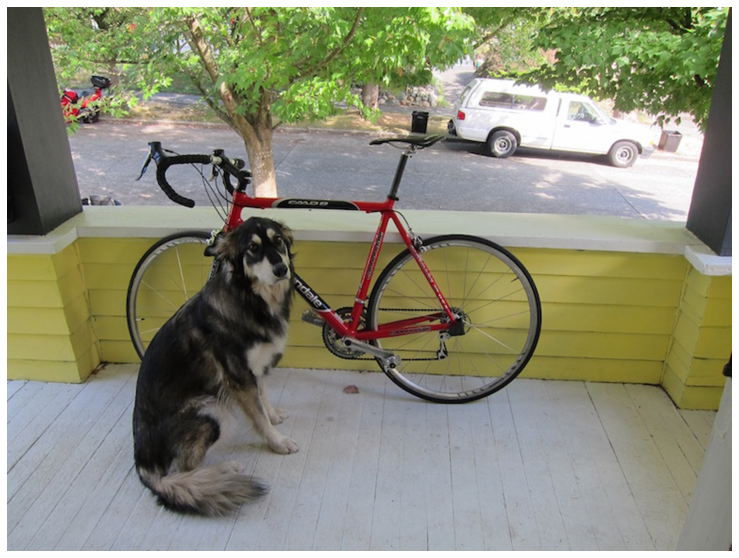

In [43]:
#After you've trained your model you can also run it against an image
!wget https://s9.stc.all.kpcdn.net/share/i/12/10186046/inx960x640.jpg
!./darknet detector test data/obj.data yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights inx960x640.jpg -i 0 -thresh 0.15
#Show the image
imShow('dog.jpg')

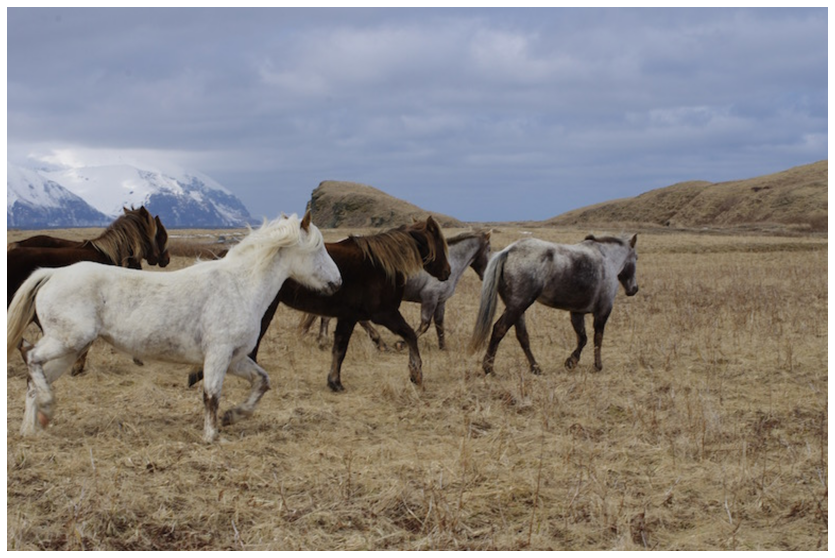

In [41]:
imShow("horses.jpg")

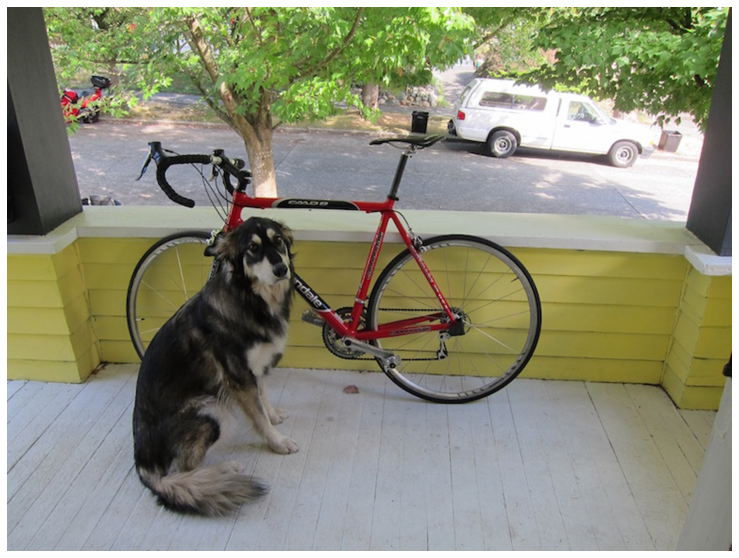

In [42]:
imShow("dog.jpg")

In [44]:
#Now, once you've put everything in place, you can run the command, in my case that was:
!./darknet detector train data/obj.data yolov3-tiny-obj.cfg yolov3-tiny.conv.15 -dont_show
#Don't forget the dont_show flag, it's good for your health ;)

/bin/bash: ./darknet: No such file or directory


In [ ]:
#Once the model's trained you can go to the backup folder
#and call download('weights') to get the trained weights you want, in my case
download('yolov3-tiny-obj_1500.weights')